In [39]:
import pandas as pd

In [40]:
df = pd.read_csv("first(374).csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [41]:
df.drop_duplicates(inplace=True)

array([[<Axes: title={'center': 'Person ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>],
       [<Axes: title={'center': 'Quality of Sleep'}>,
        <Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>],
       [<Axes: title={'center': 'Heart Rate'}>,
        <Axes: title={'center': 'Daily Steps'}>, <Axes: >]], dtype=object)

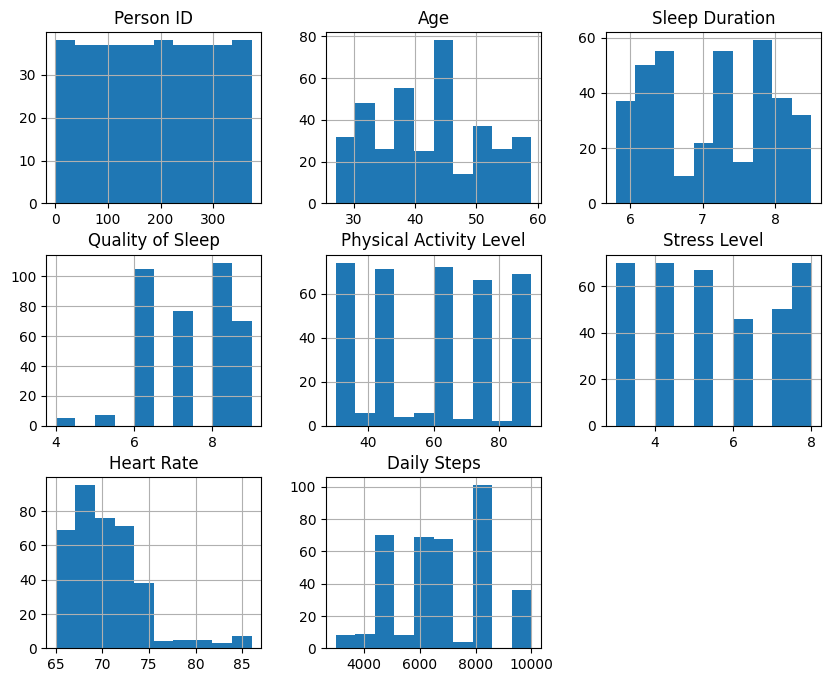

In [42]:
df.hist(figsize=(10, 8))

In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [45]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [46]:
df = df.drop(columns=["Sleep Disorder"])

In [47]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000


In [48]:
# Convert "Blood Pressure Ratio" from string (e.g., "126/82") to numeric
df['Blood Pressure'] = df['Blood Pressure'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Verify the conversion
print(df[['Blood Pressure']].head())


   Blood Pressure
0        1.518072
1        1.562500
2        1.562500
3        1.555556
4        1.555556


In [49]:
# Change objects into categorical numbers
from sklearn import preprocessing

# Columns we want to transform
categorical = ["Gender",  "BMI Category"]

label_encoder = preprocessing.LabelEncoder()

for label in categorical:
    df[label] = label_encoder.fit_transform(df[label])

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,1,27,Software Engineer,6.1,6,42,6,3,1.518072,77,4200
1,2,1,28,Doctor,6.2,6,60,8,0,1.562500,75,10000
2,3,1,28,Doctor,6.2,6,60,8,0,1.562500,75,10000
3,4,1,28,Sales Representative,5.9,4,30,8,2,1.555556,85,3000
4,5,1,28,Sales Representative,5.9,4,30,8,2,1.555556,85,3000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                373 non-null    int64  
 1   Gender                   373 non-null    int64  
 2   Age                      373 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         373 non-null    int64  
 6   Physical Activity Level  373 non-null    int64  
 7   Stress Level             373 non-null    int64  
 8   BMI Category             373 non-null    int64  
 9   Blood Pressure           373 non-null    float64
 10  Heart Rate               373 non-null    int64  
 11  Daily Steps              373 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 35.1+ KB


In [51]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,1,27,Software Engineer,6.1,6,42,6,3,1.518072,77,4200
1,2,1,28,Doctor,6.2,6,60,8,0,1.562500,75,10000
2,3,1,28,Doctor,6.2,6,60,8,0,1.562500,75,10000
3,4,1,28,Sales Representative,5.9,4,30,8,2,1.555556,85,3000
4,5,1,28,Sales Representative,5.9,4,30,8,2,1.555556,85,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,0,59,Nurse,8.1,9,75,3,3,1.473684,68,7000
369,370,0,59,Nurse,8.1,9,75,3,3,1.473684,68,7000
370,371,0,59,Nurse,8.0,9,75,3,3,1.473684,68,7000
371,372,0,59,Nurse,8.1,9,75,3,3,1.473684,68,7000


In [52]:
df['Physical Activity Level'].describe()

count    373.000000
mean      59.128686
std       20.842589
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

In [53]:
df['Blood Pressure'].describe()

count    373.000000
mean       1.520256
std        0.029289
min        1.473684
25%        1.500000
50%        1.529412
75%        1.533333
max        1.573333
Name: Blood Pressure, dtype: float64

In [54]:
## Normalization of Sleep Duration & Quality of Sleep & Physical Activity Level & Stress Level & Blood Pressure & Heart Rate
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df[['Physical Activity Level']] = scaler.fit_transform(df[['Physical Activity Level']])
df[['Physical Activity Level']].describe()


,Physical Activity Level
count,373.000000
mean,0.485478
std,0.347376
min,0.000000
25%,0.250000
50%,0.500000
75%,0.750000
max,1.000000


In [55]:

numerical_columns = df.select_dtypes(include=['number']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count number of outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        outlier_info[col] = {
            "Q1": Q1, "Q3": Q3, "IQR": IQR,
            "Lower Bound": lower_bound, "Upper Bound": upper_bound,
            "Num Outliers": len(outliers),
            "Outliers": outliers.values  # Show outlier values
        }
    
    return outlier_info

# Detect outliers in all numerical columns
outliers = detect_outliers_iqr(df, numerical_columns)

# Display results
for col, info in outliers.items():
    print(f"\n📊 Outlier Analysis for: {col}")
    print(f"Q1: {info['Q1']}, Q3: {info['Q3']}, IQR: {info['IQR']}")
    print(f"Lower Bound: {info['Lower Bound']}, Upper Bound: {info['Upper Bound']}")
    print(f"Number of Outliers: {info['Num Outliers']}")
    print(f"Outliers: {info['Outliers']}\n")



📊 Outlier Analysis for: Person ID
Q1: 94.0, Q3: 280.0, IQR: 186.0
Lower Bound: -185.0, Upper Bound: 559.0
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Gender
Q1: 0.0, Q3: 1.0, IQR: 1.0
Lower Bound: -1.5, Upper Bound: 2.5
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Age
Q1: 35.0, Q3: 50.0, IQR: 15.0
Lower Bound: 12.5, Upper Bound: 72.5
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Sleep Duration
Q1: 6.4, Q3: 7.8, IQR: 1.3999999999999995
Lower Bound: 4.300000000000001, Upper Bound: 9.899999999999999
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Quality of Sleep
Q1: 6.0, Q3: 8.0, IQR: 2.0
Lower Bound: 3.0, Upper Bound: 11.0
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Physical Activity Level
Q1: 0.25, Q3: 0.75, IQR: 0.5
Lower Bound: -0.5, Upper Bound: 1.5
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Stress Level
Q1: 4.0, Q3: 7.0, IQR: 3.0
Lower Bound: -0.5, Upper Bound: 11.5
Number of Outliers: 

In [56]:
df.to_csv('first_clean.csv', index=False)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,1,27,Software Engineer,6.1,6,0.20,6,3,1.518072,77,4200
1,2,1,28,Doctor,6.2,6,0.50,8,0,1.562500,75,10000
2,3,1,28,Doctor,6.2,6,0.50,8,0,1.562500,75,10000
3,4,1,28,Sales Representative,5.9,4,0.00,8,2,1.555556,85,3000
4,5,1,28,Sales Representative,5.9,4,0.00,8,2,1.555556,85,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,0,59,Nurse,8.1,9,0.75,3,3,1.473684,68,7000
369,370,0,59,Nurse,8.1,9,0.75,3,3,1.473684,68,7000
370,371,0,59,Nurse,8.0,9,0.75,3,3,1.473684,68,7000
371,372,0,59,Nurse,8.1,9,0.75,3,3,1.473684,68,7000
